In [1]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## Split the Data into Training and Testing Sets

In [2]:
# read the lending_data.csv data from the Resources folder into a Pandas DataFrame.
df = pd.read_csv('Resources/lending_data.csv')

# review the DataFrame
df.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
5,10100.0,7.438,50600,0.407115,4,1,20600,0
6,10300.0,7.490,51100,0.412916,4,1,21100,0
7,8800.0,6.857,45100,0.334812,3,0,15100,0
8,9300.0,7.096,47400,0.367089,3,0,17400,0
9,9700.0,7.248,48800,0.385246,4,0,18800,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [6]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [7]:
# create the labels set (y) from the “loan_status” column, and then create the features (X) DataFrame from the remaining columns
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

In [8]:
# Review the y variable Series
print(y)
y.info()

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 77536 entries, 0 to 77535
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
77536 non-null  int64
dtypes: int64(1)
memory usage: 605.9 KB


In [9]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [10]:
# Split the data into training and testing datasets by using train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(58152, 7)

## Create a Logistic Regression Model with the Original Data

In [11]:
# Fit a logistic regression model by using the training data (X_train and y_train)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [12]:
# save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Evaluate the model’s performance by doing the following:
Generate a confusion matrix.

Print the classification report.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(58152, 7) (19384, 7)


In [14]:
# Generate a confusion matrix for the model

In [15]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # fit the model to the training data
    model.fit(X_train, y_train)
    
    # predict labels and probabilities
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # check predictions to debug
    print(f"Train Predictions (first 10): {train_preds[:10]}")
    print(f"Test Predictions (first 10): {test_preds[:10]}")
    print(f"Train Probabilities (first 10): {train_proba[:10]}")
    print(f"Test Probabilities (first 10): {test_proba[:10]}")

    # Generate metrics for the TRAIN data
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # generate thr metrics for the test data
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # create heatmap of confusion matrix
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(test_cf, cmap='Blues')
    for (i, j), val in np.ndenumerate(test_cf):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=16)
    # customize and label
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
    plt.colorbar(cax)

    # show the heatmap
    plt.show()

    # set ROC curve
    fpr, tpr, _ = roc_curve(y_test, test_proba)
    plt.figure(figsize=(6, 6))
    
    # plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # label and customize
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # show the ROC
    plt.show()

Train Predictions (first 10): [0 0 0 0 0 0 0 0 0 0]
Test Predictions (first 10): [0 1 0 0 0 0 0 0 0 0]
Train Probabilities (first 10): [1.23887562e-04 4.12759274e-04 9.36908769e-05 4.98056180e-03
 1.37060857e-04 4.09335323e-05 3.41866941e-04 2.42160051e-03
 1.65219264e-04 1.36772829e-04]
Test Probabilities (first 10): [1.65220045e-04 5.00465949e-01 7.78364468e-03 2.66002729e-03
 7.91355508e-05 1.02756896e-04 1.02989327e-04 1.98757138e-04
 1.66557332e-03 1.15604493e-04]
TRAIN METRICS
    Confusion Matrix: 
    [[55967   310]
 [  116  1759]]
    
    AUC: 0.9944504741427818

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.94      0.89      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.97      0.94     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18673    86]
 [

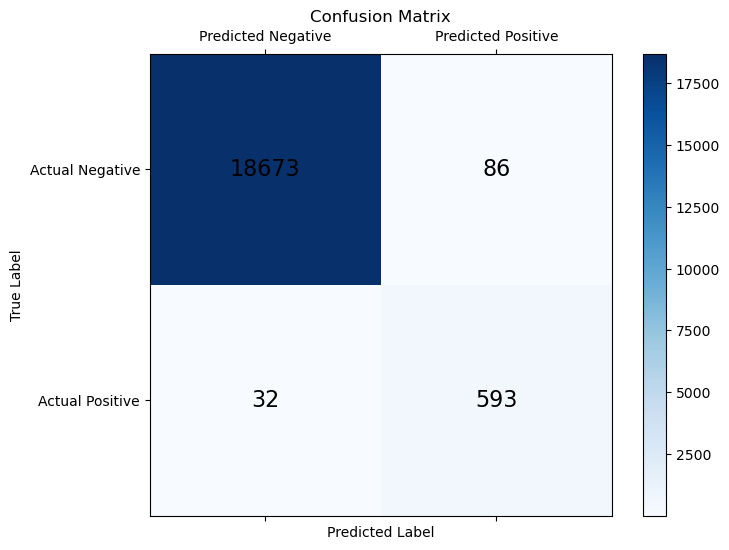

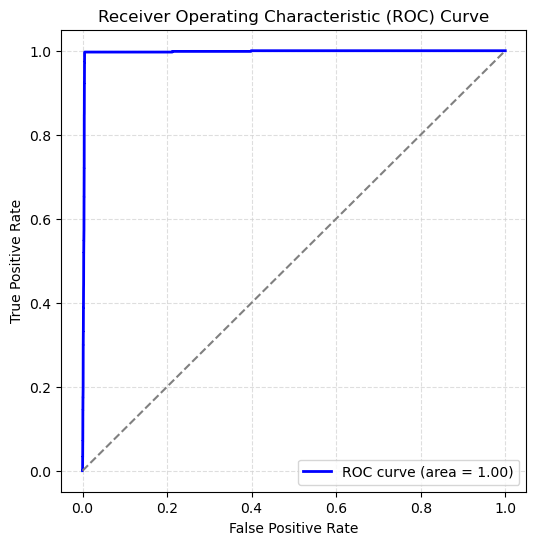

In [16]:
# print the classification report for the model
lr = LogisticRegression()

# apply the machine learning
doClassification(lr, X_train, X_test, y_train, y_test)

##### Question: How well does the logistic regression model predict both the 0 (healthy loan) and 1 (high-risk loan) labels?
The model is predicting most cases correctly but is better at predicting the healthy loans out of the test data. There is a loss in accuracy prediction defaulting loans, as in the training data the large amount of good standing loan data is making overwhelming the model with examples of healthy loan data. There are more false positives then false negatives, which shows that the model will be more likely to flag a healthy loan then miss a high risk loan. The comparatively low number of false positives and false negatives suggests that the model would be a good model to use but could be improved. es.r: